In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("student-mat.csv")

In [4]:
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

For this analysis, we are going to combine weekday and weekend alcohol consumption into one attribute (1-5):

In [6]:
df["Alc"] = (df["Walc"] + df["Dalc"]).div(2).round().astype(int)
df.drop('Dalc', axis=1, inplace=True)
df.drop('Walc', axis=1, inplace=True)


Let's see if any attributes are correlated:

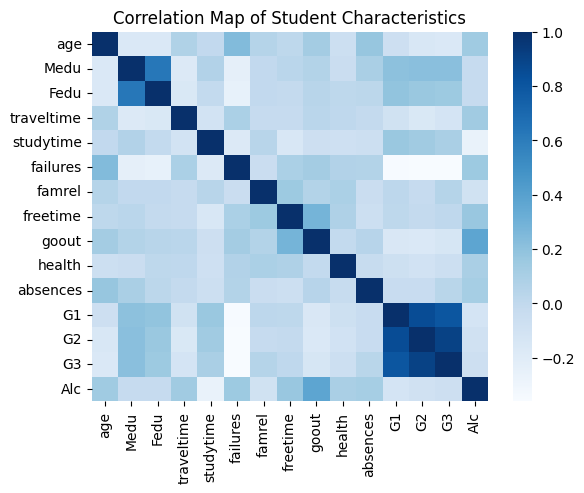

In [7]:
dataplot = sns.heatmap(df.corr(method='pearson',numeric_only = True),cmap = "Blues")
dataplot.set_title("Correlation Map of Student Characteristics")
plt.show()

# Data Distribution

The map shows that no attributes are highly correlated besides G1, G2, and G3 (student's grades) which makes sense.

Let's take a look at how our actual data is distributed:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def draw_percentage_pie_chart(df, attribute):

  # Get the value counts for the attribute
  value_counts = df[attribute].value_counts().sort_values(ascending=False)
  
  # Calculate percentages
  total = len(df)
  percentages = (value_counts / total) * 100
  
  # Combine labels with counts and format as strings
  labels = [f"{label} ({int(count)}) - {pct:.1f}%" for label, count, pct in zip(value_counts.index, value_counts, percentages)]
  
  # Create the pie chart
  plt.pie(percentages, labels=labels, autopct="")  # Disable default autopct
  plt.title(f'Percentage Distribution by {attribute}')
  plt.show()

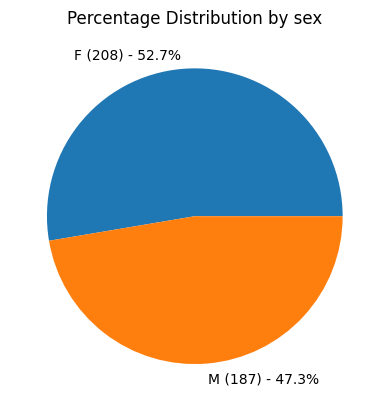

In [9]:
draw_percentage_pie_chart(df, 'sex')

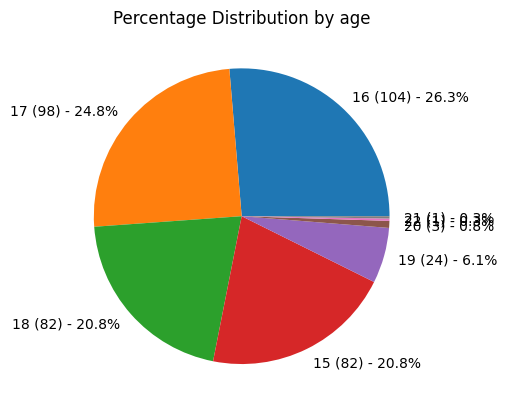

In [10]:
draw_percentage_pie_chart(df, 'age')

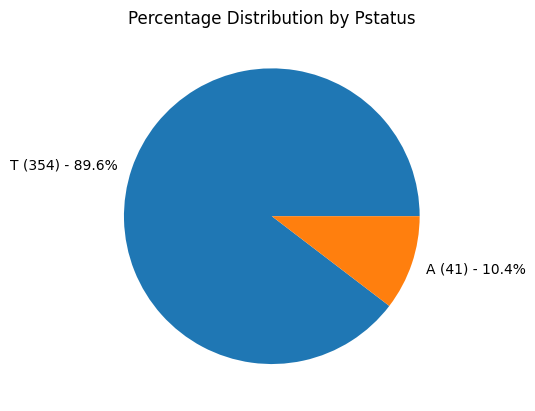

In [11]:
draw_percentage_pie_chart(df, 'Pstatus')

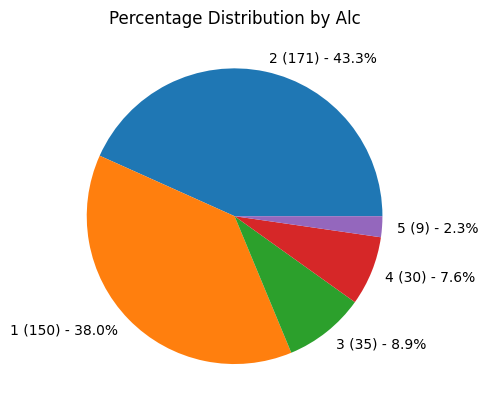

In [12]:
draw_percentage_pie_chart(df, 'Alc')

# Alcohol Consumption Percentage Distributions

Let's see percentage distributions of alcohol consumption within each attribute:

In [13]:
def percentages_consumption_by_attribute(df, attribute):
  alc_counts = df.groupby([attribute, 'Alc']).size()
  consumption_totals = df.groupby([attribute]).size()
  
  percentages_dalc = alc_counts / consumption_totals * 100

  # Plot consumption (one graph)
  percentages_dalc.unstack().plot(kind="bar", stacked=True)
  plt.xlabel(attribute)
  plt.ylabel('Percentage of students')
  plt.yticks(range(0, 101, 10))
  plt.title(f'Student Consumption By: {attribute}')
  plt.legend(('Very Low', 'Low', 'Medium', 'High', 'Very High'), title = "Alcohol Consumption", loc='lower right')
  
  plt.tight_layout()
  plt.show()

Running it with some examples:

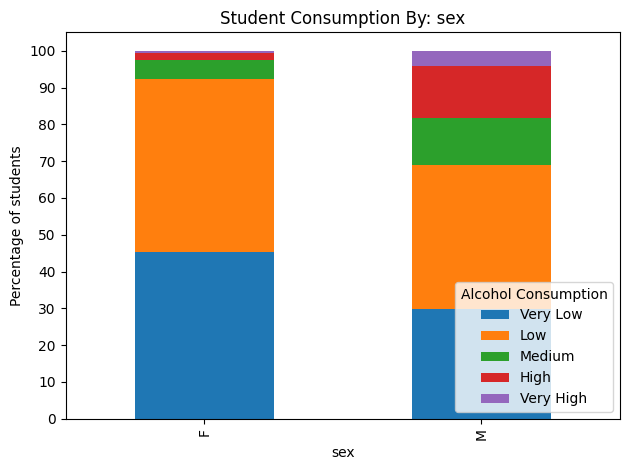

In [14]:
percentages_consumption_by_attribute(df, 'sex')

Seems clear that males have higher consumption of females based on this graph difference

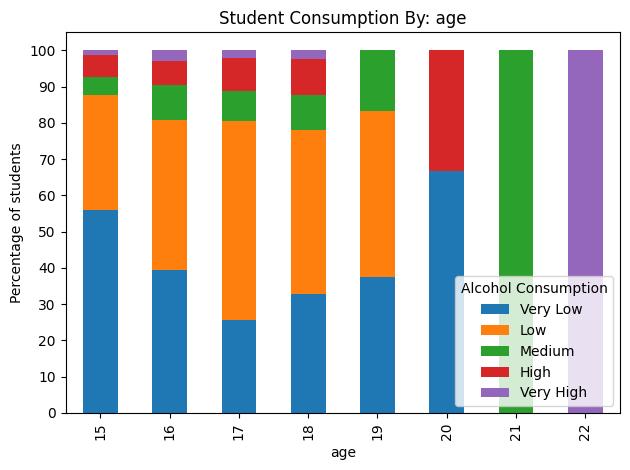

In [15]:
percentages_consumption_by_attribute(df, 'age')

Why does 21 and 22 only have a single attribute? The age pie chart showed how little samples there were. Since it's not nearly enough sample count it's highly inaccurate and we will ignore it.

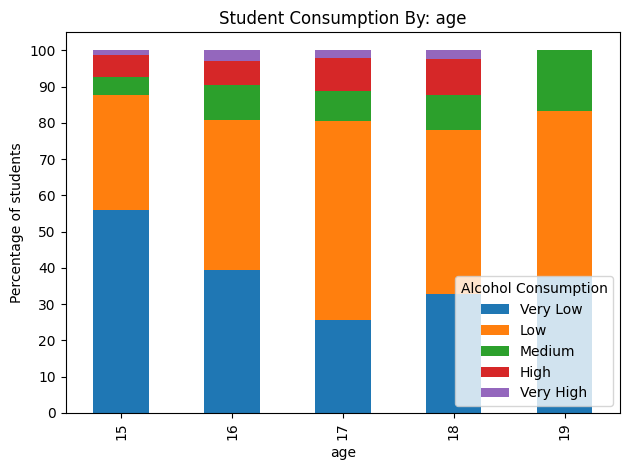

In [16]:
df.drop(df[df['age'] >= 20].index, inplace=True)
percentages_consumption_by_attribute(df, 'age')

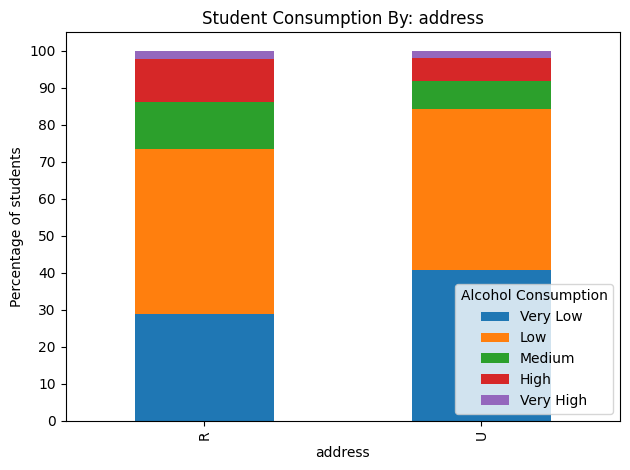

In [17]:
percentages_consumption_by_attribute(df, 'address')

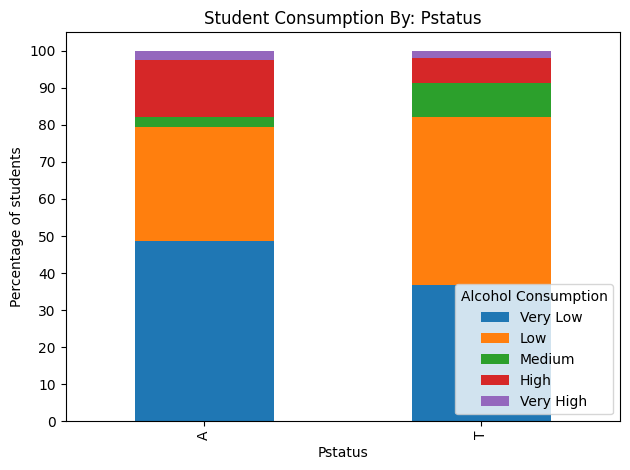

In [18]:
percentages_consumption_by_attribute(df, 'Pstatus')

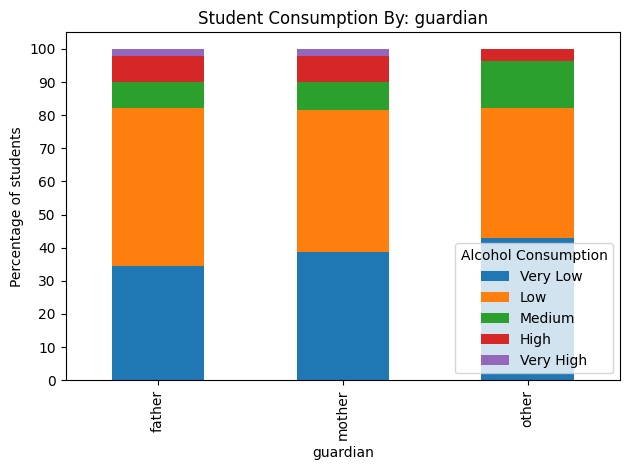

In [19]:
percentages_consumption_by_attribute(df, 'guardian')

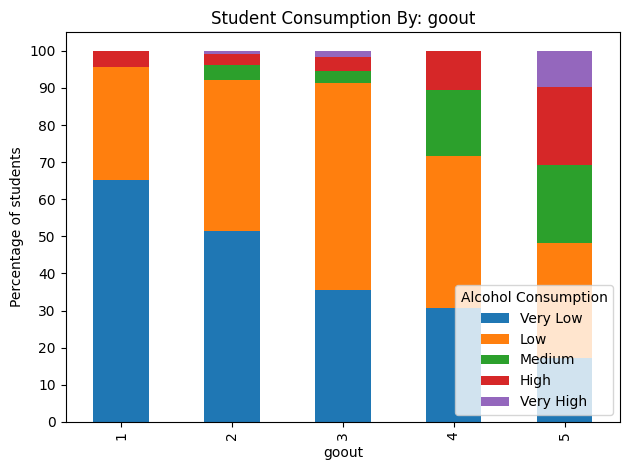

In [20]:
percentages_consumption_by_attribute(df, 'goout')

# Grades and Alcohol Consumption

Let's see how alcohol consumption correlates to grade scores:

In [ ]:
def draw_consumption_histograms(df, attribute, xlabel):
    low_consumption_df = df[df['Alc'] <= 1]
    high_consumption_df = df[df['Alc'] >= 4]

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.histplot(low_consumption_df[attribute], ax=axes[0]) 
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Low Alcohol Consumption')

    sns.histplot(high_consumption_df[attribute], ax=axes[1])
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('High Alcohol Consumption')

    plt.tight_layout()
    plt.show()

In [21]:
avg_grades = df.groupby('Alc')['G2'].mean()
print('Average grades by alcohol consumption:')
print(avg_grades)

Average grades by alcohol consumption:
Alc
1    11.020270
2    10.754386
3     9.235294
4    10.413793
5    11.125000
Name: G2, dtype: float64


Seems like alcohol doesn't affect grades, but lets look at a histogram plots too:

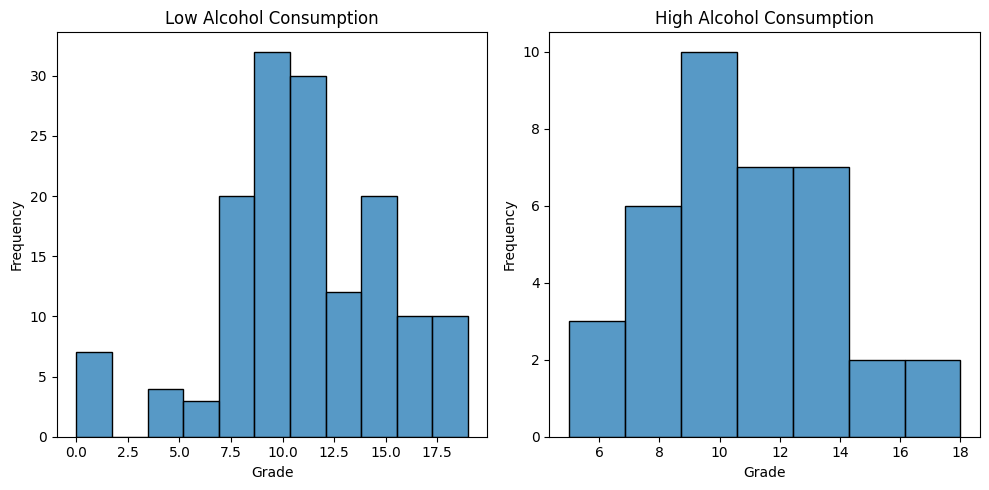

In [22]:
low_consumption_df = df[df['Alc'] <= 1]
high_consumption_df = df[df['Alc'] >= 4]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(low_consumption_df['G2'], ax=axes[0]) 
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Low Alcohol Consumption')

sns.histplot(high_consumption_df['G2'], ax=axes[1])
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Frequency')
axes[1].set_title('High Alcohol Consumption')

plt.tight_layout()
plt.show()


The distribution is normal enough to see that grades aren't really affected by alcohol consumption.

Average absence count by alcohol consumption:
Alc
1    4.925676
2    5.690058
3    7.176471
4    7.344828
5    7.750000
Name: absences, dtype: float64


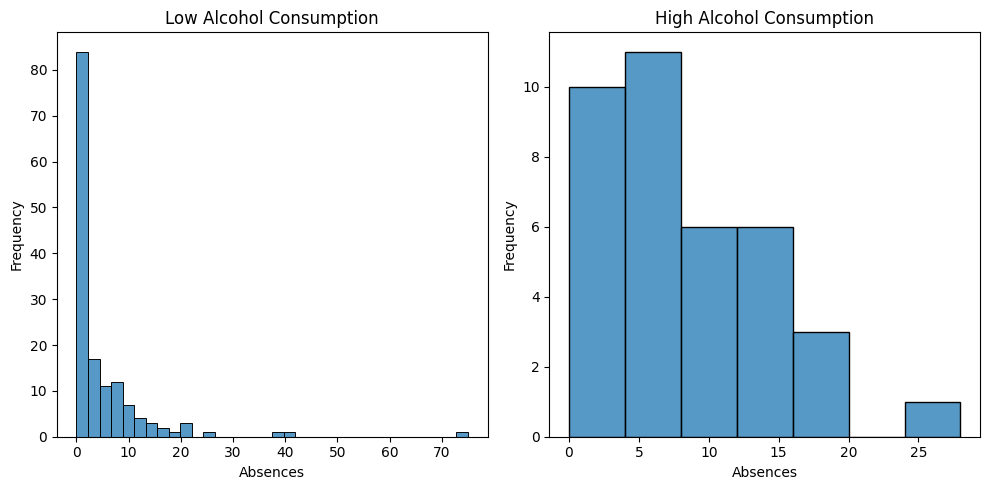

Average absence count by alcohol consumption:
Alc
1    2.0
2    4.0
3    4.0
4    6.0
5    7.0
Name: absences, dtype: float64


In [27]:
avg_grades = df.groupby('Alc')['absences'].mean()
print('Average absence count by alcohol consumption:')
print(avg_grades)

low_consumption_df = df[df['Alc'] <= 1]
high_consumption_df = df[df['Alc'] >= 4]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(low_consumption_df['absences'], ax=axes[0]) 
axes[0].set_xlabel('Absences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Low Alcohol Consumption')

sns.histplot(high_consumption_df['absences'], ax=axes[1])
axes[1].set_xlabel('Absences')
axes[1].set_ylabel('Frequency')
axes[1].set_title('High Alcohol Consumption')

plt.tight_layout()
plt.show()

avg_grades = df.groupby('Alc')['absences'].median()
print('Median absence count by alcohol consumption:')
print(avg_grades)




In [24]:
mldf = pd.read_csv("student-mat.csv")

mldf.drop(mldf.columns[32], axis=1, inplace = True)
mldf.drop(mldf.columns[31], axis=1, inplace = True)
mldf.drop(mldf.columns[30], axis=1, inplace = True)
mldf.drop(mldf.columns[28], axis=1, inplace = True)
mldf.drop(mldf.columns[24], axis=1, inplace = True)
mldf.drop(mldf.columns[22], axis=1, inplace = True)
mldf.drop(mldf.columns[21], axis=1, inplace = True)
mldf.drop(mldf.columns[19], axis=1, inplace = True)
mldf.drop(mldf.columns[18], axis=1, inplace = True)
mldf.drop(mldf.columns[17], axis=1, inplace = True)
mldf.drop(mldf.columns[12], axis=1, inplace = True)
mldf.drop(mldf.columns[10], axis=1, inplace = True)
mldf.drop(mldf.columns[4], axis=1, inplace = True)
mldf.drop(mldf.columns[3], axis=1, inplace = True)
mldf.drop(mldf.columns[0], axis=1, inplace = True)
#sex, age, pstatus, medu, fedu, mjob, fjob, guardian, studytime, failures, schoolsup
#famsup, higher, famrel, goout, dalc, walc, absences
print(mldf)

mldf = pd.get_dummies(mldf)
print(mldf)

    sex  age Pstatus  Medu  Fedu      Mjob      Fjob guardian  studytime  \
0     F   18       A     4     4   at_home   teacher   mother          2   
1     F   17       T     1     1   at_home     other   father          2   
2     F   15       T     1     1   at_home     other   mother          2   
3     F   15       T     4     2    health  services   mother          3   
4     F   16       T     3     3     other     other   father          2   
..   ..  ...     ...   ...   ...       ...       ...      ...        ...   
390   M   20       A     2     2  services  services    other          2   
391   M   17       T     3     1  services  services   mother          1   
392   M   21       T     1     1     other     other    other          1   
393   M   18       T     3     2  services     other   mother          1   
394   M   19       T     1     1     other   at_home   father          1   

     failures schoolsup famsup higher  famrel  goout  Dalc  Walc  absences  
0         